In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv('synth_temp.csv')

In [0]:
df.head()

,Temperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485702,1843
3,14.202069,1844
4,12.831530,1845


There are 6 points in 1841
and 12 points in 2010
and 12 points in 1902


,Temperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906


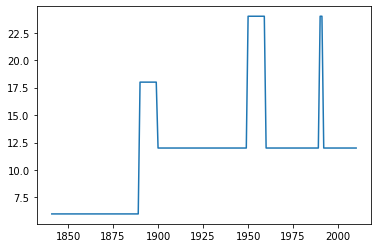

In [0]:
#
# take a quick look at the number of data points per year
#
print('There are ' + 
      str(len(df.loc[df['Year'] == 1841])) + 
      ' points in 1841\n' +
      'and ' +
      str(len(df.loc[df['Year'] == 2010])) +
      ' points in 2010\n' +
      'and ' +
      str(len(df.loc[df['Year'] == 1902])) +
      ' points in 1902')
#
# seeing there are differnt numbers of points, let's do a quick chart
#
plt.plot(df['Year'].unique(), [len(df.loc[df['Year'] == i]) for i in df['Year'].unique()])
#
# slice 1902 and forward
#
df = df.loc[df.Year > 1901]
df.head()

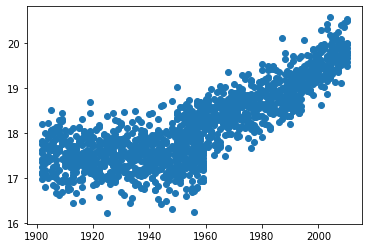

In [0]:
#
# quick plot to understand the data so far
#
plt.scatter(df.Year, df.Temperature)

In [0]:
#
# roll up by year
#
df_group_year = df.groupby('Year').agg(['mean'])
print(df_group_year.head())
print(df_group_year.tail())

     Temperature
            mean
Year            
1902   17.438122
1903   17.375456
1904   17.558674
1905   17.740646
1906   17.501770
     Temperature
            mean
Year            
2006   19.827744
2007   19.694244
2008   19.793876
2009   19.884571
2010   19.903760


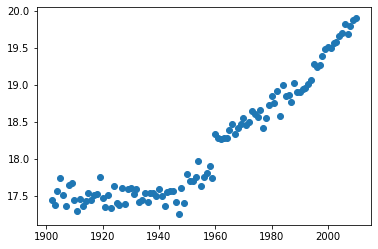

In [0]:
#
# visualize result of averaging over each year
#
plt.scatter(df_group_year.index, df_group_year['Temperature'])

In [0]:
window = 10
smoothed_df = \
  df_group_year.Temperature.rolling(window).mean()
print(smoothed_df.head(14))
print(smoothed_df.tail())

           mean
Year           
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911  17.501145
1912  17.502700
1913  17.500737
1914  17.487112
1915  17.466333
           mean
Year           
2006  19.548792
2007  19.591266
2008  19.631821
2009  19.671825
2010  19.710821


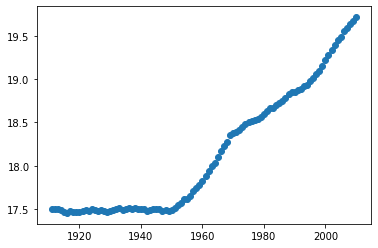

In [0]:
#
# filter out the NaN values
#
smoothed_df = smoothed_df[smoothed_df['mean'].notnull()]
#
# quick plot to understand what we have so far
#
plt.scatter(smoothed_df.index, smoothed_df['mean'])

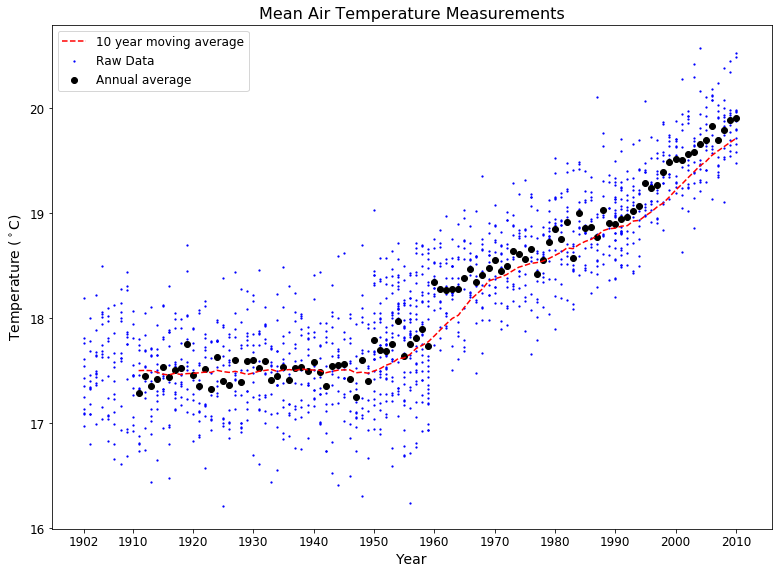

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.Temperature, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
#
# Annual averages
#
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.Temperature, 
           label = 'Annual average', c = 'k')
#
# Moving averages
#
ax.plot(smoothed_df.index, 
        smoothed_df, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)